In [67]:
import pandas as pnda
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data_path = '/content/drive/MyDrive/ML/data2.txt'

In [69]:
data = pnda.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [70]:
def plotData(data, label_x, label_y, label_postv, label_negtv, axes=None):
    
    negtv = data['y'] == 0
    postv = data['y'] == 1

    if axes == None:
        axes = plt.gca()
    axes.scatter(data[postv]['x1'], data[postv]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_postv)
    axes.scatter(data[negtv]['x1'], data[negtv]['x2'], c='black', s=60, label=label_negtv)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

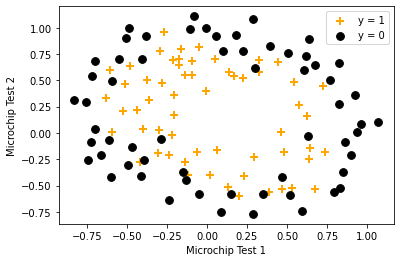

In [71]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [72]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]

X = x.values
y = y.values

In [73]:
def mapFeature( x1col, x2col):
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [74]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 28)


In [75]:
def sigmoid(z):
   s = 1 / (1 + np.exp(-z))
   return s

In [76]:
def initializeWithZeroes(dim):
    w = np.zeros([dim, 1])
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [77]:
def propagate(w, X, Y, lambd = 0.):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X))
    cost = (-1 / m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A))) + (lambd/(2*m)) * np.sum(np.dot(w, w.T))
    dw = (1 / m) * np.dot(X, (A - Y).T) + (lambd /m) * w
    return dw, cost

In [78]:
XX = XX.T

In [79]:
w, b = initializeWithZeroes(XX.shape[0])
print(XX.shape)
print(w.shape)
print(y.shape)

(28, 118)
(28, 1)
(118, 1)


In [80]:
def optmz(w, X, Y, num_iterations, learning_rate, print_cost = False, lambd  = 0):

    
    costs = []
    minimumCost = 0
    for i in range(num_iterations):
        
        dw, cost = propagate(w, X, Y, lambd)

        w = w - learning_rate * dw

        minimumCost = cost

        if i % 10000 == 0:
            costs.append(cost)
        
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    
    return w, minimumCost

In [81]:
w, minimumCost = optmz(w, XX, y.T, num_iterations= 1000000, learning_rate = 0.001, print_cost = False, lambd = 1)
print(w)
print(minimumCost)

[[ 1.14213145]
 [ 0.60132088]
 [ 1.167178  ]
 [-1.87174401]
 [-0.9157084 ]
 [-1.2695127 ]
 [ 0.12668332]
 [-0.36873221]
 [-0.3451998 ]
 [-0.17376403]
 [-1.42385891]
 [-0.04858534]
 [-0.60641603]
 [-0.26931731]
 [-1.16315361]
 [-0.24309538]
 [-0.20708119]
 [-0.04320545]
 [-0.28027399]
 [-0.28695651]
 [-0.46911904]
 [-1.03618109]
 [ 0.02921455]
 [-0.29262298]
 [ 0.01734985]
 [-0.32896723]
 [-0.13795881]
 [-0.93200876]]
0.8613529293511011


In [82]:
def plotBoundary(Nw, XX, y, lambda1=0.):

    w, minimumCost = optmz(Nw, XX, y.T, num_iterations= 1000000, learning_rate = 0.001, print_cost = False, lambd=lambda1)
    print(w, '\n\nCost : ', minimumCost, '\n \n ')
    xValues = np.linspace(-1,1.5,50)
    yValues = np.linspace(-1,1.5,50)
    zValues = np.zeros((len(xValues),len(yValues)))

    for i in range(len(xValues)):
        for j in range(len(yValues)):
            featuresij = mapFeature(np.array([xValues[i]]),np.array([yValues[j]]))
            zValues[i][j] = np.dot(w.T,featuresij.T)

    zValues = zValues.transpose()

    u, v = np.meshgrid( xValues, yValues )
    countr = plt.contour( xValues, yValues, zValues, [0])
    
    fmt1 = { 0:'Lambda = %d'%lambda1}
    plt.clabel(countr, inline=1, fontsize=9, fmt=fmt1)
    plt.title("Decision Boundary")

[[ 3.25244274]
 [ 2.30608816]
 [ 3.5688447 ]
 [-5.0283261 ]
 [-4.11115661]
 [-4.9824597 ]
 [ 1.02420559]
 [-1.50817108]
 [-0.9483372 ]
 [-0.33271507]
 [-4.10498621]
 [ 0.28791734]
 [-2.18809451]
 [-1.54637329]
 [-3.3736672 ]
 [-0.60856201]
 [-0.70798831]
 [ 0.42613897]
 [-1.29118117]
 [-1.49517217]
 [-0.24580746]
 [-3.25834248]
 [ 0.37348819]
 [-0.97043145]
 [ 0.2946388 ]
 [-1.3071119 ]
 [-1.14328699]
 [-1.68066442]] 

Cost :  0.34042056526759507 
 
 
[[ 1.14213145]
 [ 0.60132088]
 [ 1.167178  ]
 [-1.87174401]
 [-0.9157084 ]
 [-1.2695127 ]
 [ 0.12668332]
 [-0.36873221]
 [-0.3451998 ]
 [-0.17376403]
 [-1.42385891]
 [-0.04858534]
 [-0.60641603]
 [-0.26931731]
 [-1.16315361]
 [-0.24309538]
 [-0.20708119]
 [-0.04320545]
 [-0.28027399]
 [-0.28695651]
 [-0.46911904]
 [-1.03618109]
 [ 0.02921455]
 [-0.29262298]
 [ 0.01734985]
 [-0.32896723]
 [-0.13795881]
 [-0.93200876]] 

Cost :  0.8613529293511011 
 
 
[[ 0.21471371]
 [-0.00759417]
 [ 0.17609632]
 [-0.40128043]
 [-0.11744862]
 [-0.23187723]

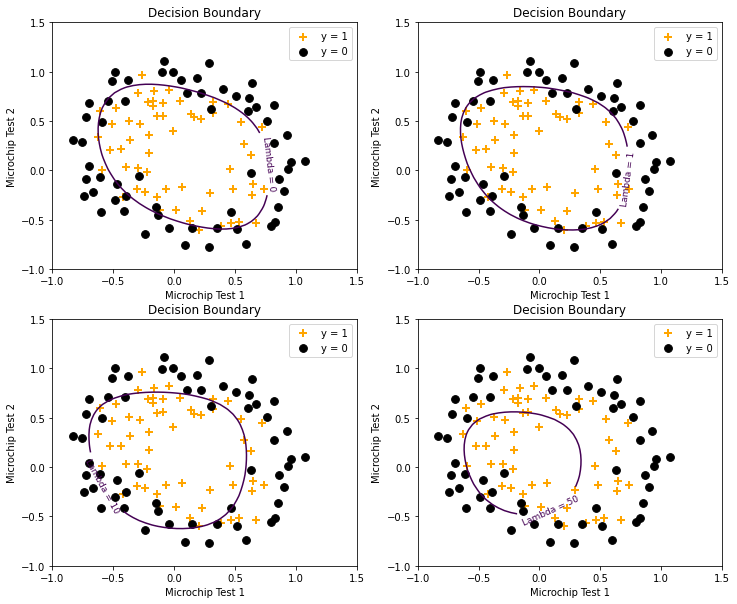

In [83]:
Nw, b = initializeWithZeroes(XX.shape[0])

plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,50.)